1. Unsupervised ML
2. Applicationp :       (real world applications)
        a. Customer Segmentation:  
                        Here we have to group customers based on similar feature
                        
        b. Recomendation System:
                        Ex: Amazon Advertisement
                        
        c. Target Marketing Campaigns:
        
        d. Anomaly Detection:
                        
        

In [1]:
# Clusturing (grouping)   # clustering is nothing but grouping.

In [50]:


import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\Data Science\MACHINE LEARNING\Live.csv")
df.head()

status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0          1         1           0      NaN      NaN      NaN      NaN  
1          0         0           0      NaN      NaN      NaN      NaN  
2          1         0           0      NaN      NaN      NaN      NaN  
3          0         0           0      NaN      NaN      NaN      NaN  
4          0         0           0      NaN      NaN      NaN      NaN

In [3]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [51]:
df.drop(['Column2','Column1','Column3','Column4'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [6]:
df.describe()

num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  
mean      1.289362     0.696454     0.243688     0.113191  
std       8.719650     3.957183     1.597156     0.726812  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000  
max     278.000000   157.000000    51.000000    31.000000

In [52]:
df['status_id'].unique() # to check unique values.

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [28]:
len(df['status_id'].unique()) # to check how many numbers of unique values is there.

6997

In [9]:
len(df['status_published'].unique())

6913

In [29]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [53]:
df.head(3)

status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   

   num_hahas  num_sads  num_angrys  
0          1         1           0  
1          0         0           0  
2          1         0           0

In [54]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [55]:
df.head(3)

status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0       video            529           512         262        432         92   
1       photo            150             0           0        150          0   
2       video            227           236          57        204         21   

   num_wows  num_hahas  num_sads  num_angrys  
0         3          1         1           0  
1         0          0         0           0  
2         1          1         0           0

In [56]:
x = df
y = df['status_type']

In [57]:
from sklearn.preprocessing import LabelEncoder    # it will help to create categorical data into numbers.
le = LabelEncoder()
x['status_type'] = le.fit_transform(x['status_type']) # to create categorical data into numbers   

In [58]:
x['status_type']

0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int32

In [59]:
x.head()  # here we can see 'status_type' is converted to number by defaulty with the help of LabelEncoder()

status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0            3            529           512         262        432         92   
1            1            150             0           0        150          0   
2            3            227           236          57        204         21   
3            1            111             0           0        111          0   
4            1            213             0           0        204          9   

   num_wows  num_hahas  num_sads  num_angrys  
0         3          1         1           0  
1         0          0         0           0  
2         1          1         0           0  
3         0          0         0           0  
4         0          0         0           0

In [36]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [19]:
x['status_type'].unique()

array([3, 1, 0, 2])

In [60]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


In [61]:
x.head()

status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0            3            529           512         262        432         92   
1            1            150             0           0        150          0   
2            3            227           236          57        204         21   
3            1            111             0           0        111          0   
4            1            213             0           0        204          9   

   num_wows  num_hahas  num_sads  num_angrys  
0         3          1         1           0  
1         0          0         0           0  
2         1          1         0           0  
3         0          0         0           0  
4         0          0         0           0

In [62]:
# Feature Scalling               # if we have huge despersion of data at that time we have to clear a feature.


col = x.columns

In [63]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
x= ms.fit_transform(x)

In [64]:
x.head() # now this data has been converted to array format , array doesn't have head function

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [65]:
pd.DataFrame(x) # to call array format

0         1         2         3         4         5         6  \
0     1.000000  0.112314  0.024393  0.076519  0.091720  0.140030  0.010791   
1     0.333333  0.031847  0.000000  0.000000  0.031847  0.000000  0.000000   
2     1.000000  0.048195  0.011243  0.016647  0.043312  0.031963  0.003597   
3     0.333333  0.023567  0.000000  0.000000  0.023567  0.000000  0.000000   
4     0.333333  0.045223  0.000000  0.000000  0.043312  0.013699  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
7045  0.333333  0.018896  0.000000  0.000000  0.018896  0.000000  0.000000   
7046  0.333333  0.003397  0.000000  0.000000  0.002972  0.001522  0.000000   
7047  0.333333  0.000425  0.000000  0.000000  0.000212  0.001522  0.000000   
7048  0.333333  0.074522  0.000572  0.006425  0.074098  0.003044  0.000000   
7049  0.333333  0.003609  0.000000  0.000000  0.003609  0.000000  0.000000   

             7         8    9  
0     0.006369  0.019608  0.0  
1     0.000000  0.000000  0.0  
2     0.006369  0.000000  0.0  
3     0.000000  0.000000  0.0  
4     0.000000  0.000000  0.0  
...        ...       ...  ...  
7045  0.000000  0.000000  0.0  
7046  0.006369  0.000000  0.0  
7047  0.000000  0.000000  0.0  
7048  0.000000  0.000000  0.0  
7049  0.000000  0.000000  0.0  

[7050 rows x 10 columns]

In [66]:
x=pd.DataFrame(x, columns=[col])
x.head()

status_type num_reactions num_comments num_shares num_likes num_loves  \
0    1.000000      0.112314     0.024393   0.076519  0.091720  0.140030   
1    0.333333      0.031847     0.000000   0.000000  0.031847  0.000000   
2    1.000000      0.048195     0.011243   0.016647  0.043312  0.031963   
3    0.333333      0.023567     0.000000   0.000000  0.023567  0.000000   
4    0.333333      0.045223     0.000000   0.000000  0.043312  0.013699   

   num_wows num_hahas  num_sads num_angrys  
0  0.010791  0.006369  0.019608        0.0  
1  0.000000  0.000000  0.000000        0.0  
2  0.003597  0.006369  0.000000        0.0  
3  0.000000  0.000000  0.000000        0.0  
4  0.000000  0.000000  0.000000        0.0

In [69]:
# K-Means

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)  # The number of clusters to form as well as the number of centroids to generate.
kmeans.fit(x)

D:\Data Science\edyodha packages\Anaconda Packages\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=3)

In [70]:
kmeans.cluster_centers_

array([[3.28742853e-01, 1.99588196e-02, 6.50282622e-04, 5.37894046e-04,
        1.94880247e-02, 1.93982105e-03, 2.03104006e-03, 1.16647149e-03,
        2.84240297e-03, 1.51976868e-03],
       [9.63364293e-01, 5.06532935e-02, 2.77360441e-02, 3.04804142e-02,
        4.28478700e-02, 4.90844018e-02, 8.17287347e-03, 1.00742442e-02,
        8.36216840e-03, 7.50274643e-03],
       [4.79102956e-01, 4.00444107e-01, 3.03960092e-03, 4.33797051e-03,
        3.99082569e-01, 5.26906195e-03, 9.70232988e-03, 1.26609400e-03,
        9.59405169e-04, 1.97297031e-04]])

D:\Data Science\edyodha packages\Anaconda Packages\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
D:\Data Science\edyodha packages\Anaconda Packages\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
D:\Data Science\edyodha packages\Anaconda Packages\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
D:\Data Science\edyodha packages\Anaconda Packages\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tu

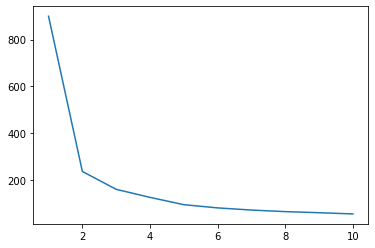

In [73]:
    cs=[]
import matplotlib.pyplot as plt

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300) # 'init= 'k-means++'' help us to make a ML robust
    kmeans.fit(x)                                                      # 'max_iter = 300' is run over one cluster.
    cs.append(kmeans.inertia_)                                      # 'max_iter' pick 300 points only nthng more than that.
plt.plot(range(1,11), cs)      # 'inertia_' is nothing but centroid number
plt.show()

In [77]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)
labels = kmeans.labels_  # it will give you the labels.
correct_label = sum( y == labels)
print('%d out of %d samples were correctly labelled'%(correct_label, y.size))
print('Accuracy', correct_label/float(y.size))

0 out of 7050 samples were correctly labelled
Accuracy 0.0


D:\Data Science\edyodha packages\Anaconda Packages\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [78]:
kmeans.labels_  # this one is labels

array([0, 1, 0, ..., 1, 1, 1])

In [79]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)
labels = kmeans.labels_  # it will give you the labels.
correct_label = sum( y == labels)
print('%d out of %d samples were correctly labelled'%(correct_label, y.size))
print('Accuracy', correct_label/float(y.size))

0 out of 7050 samples were correctly labelled
Accuracy 0.0


D:\Data Science\edyodha packages\Anaconda Packages\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


`Elbow method is used for selecting K Value`

Learnt from youtube

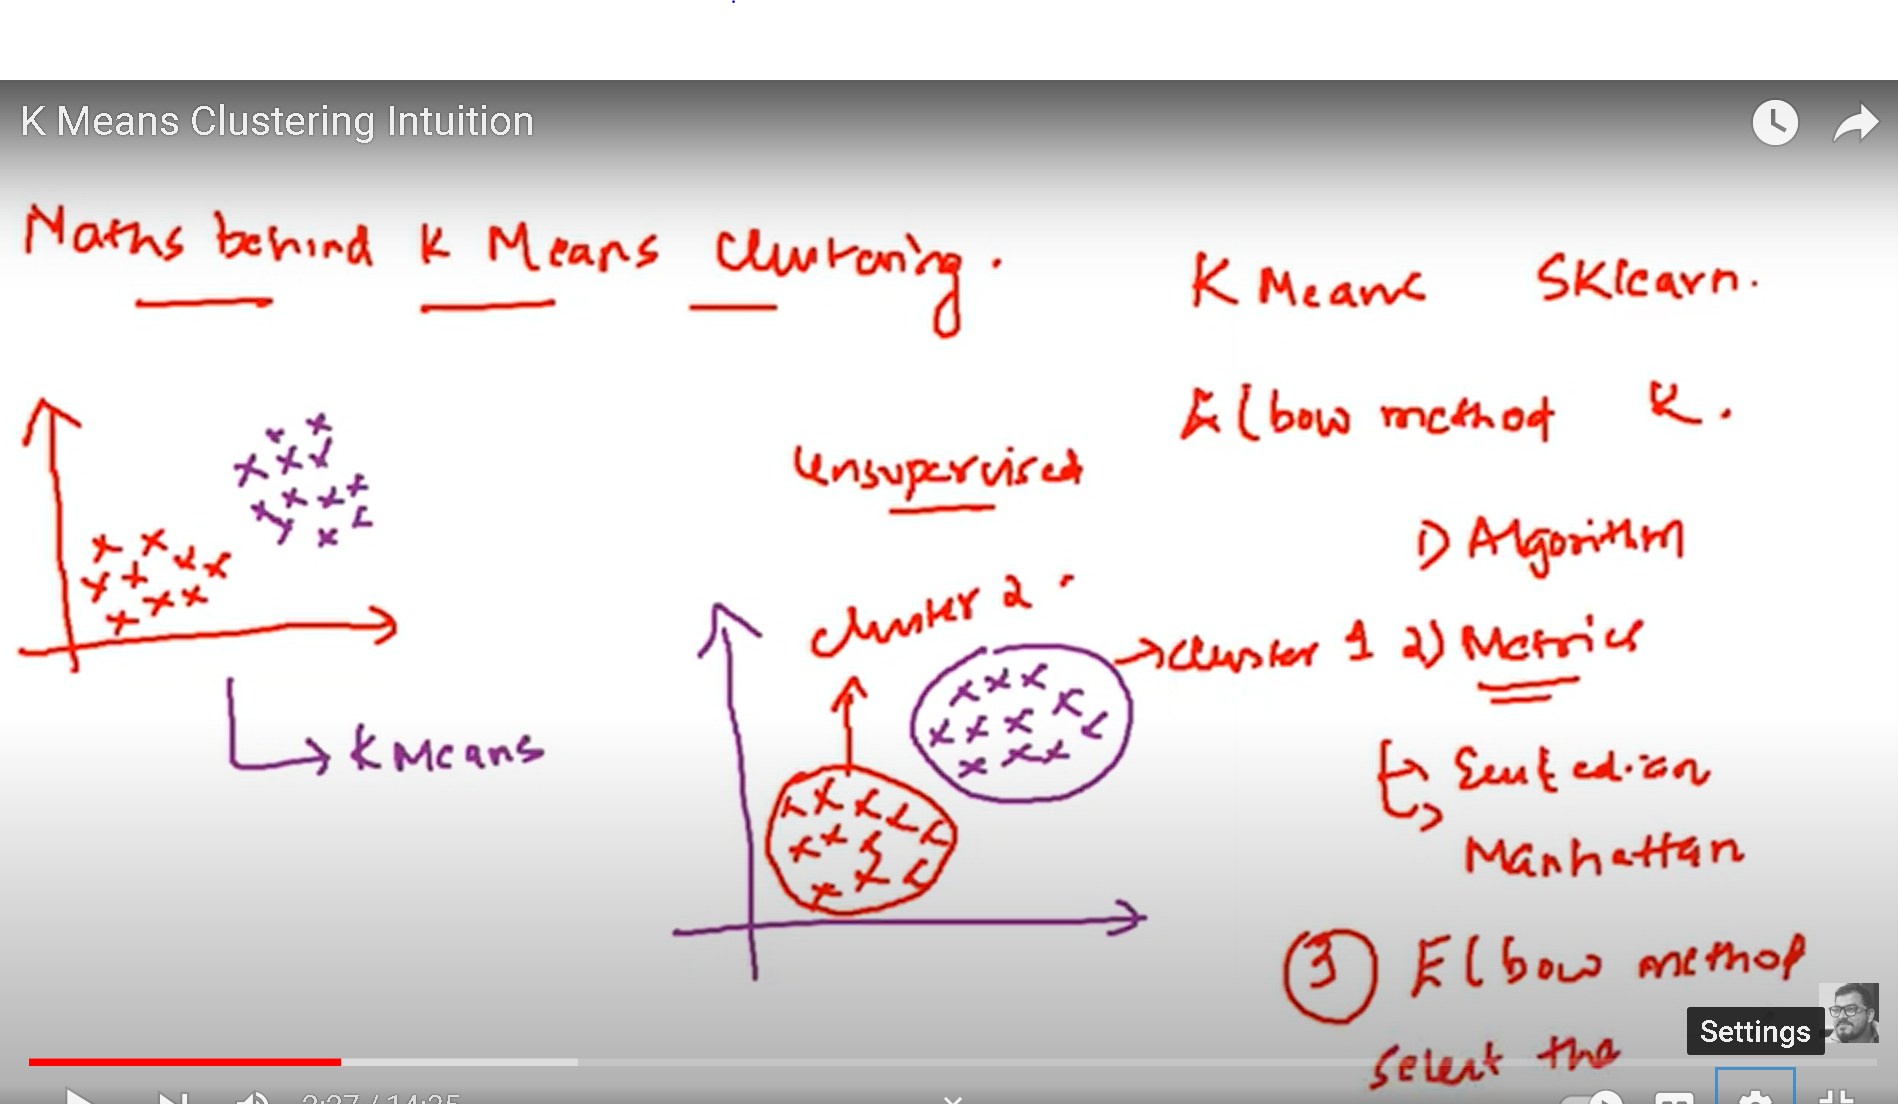

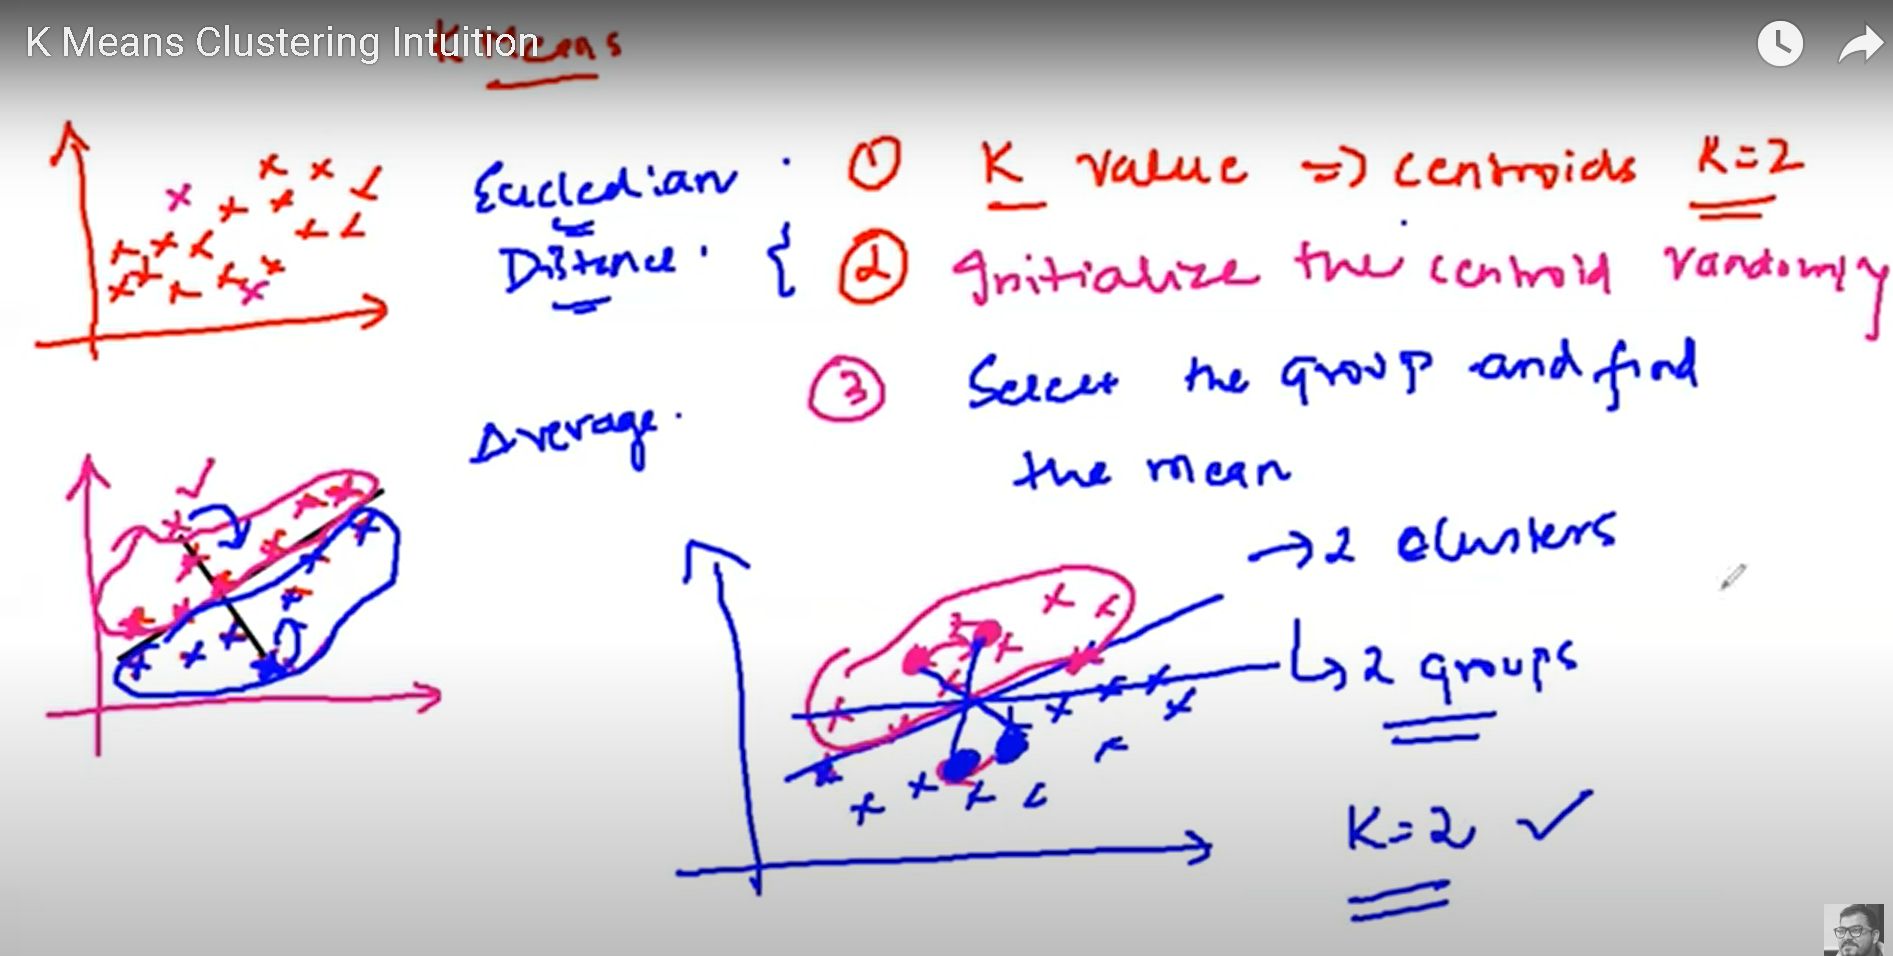

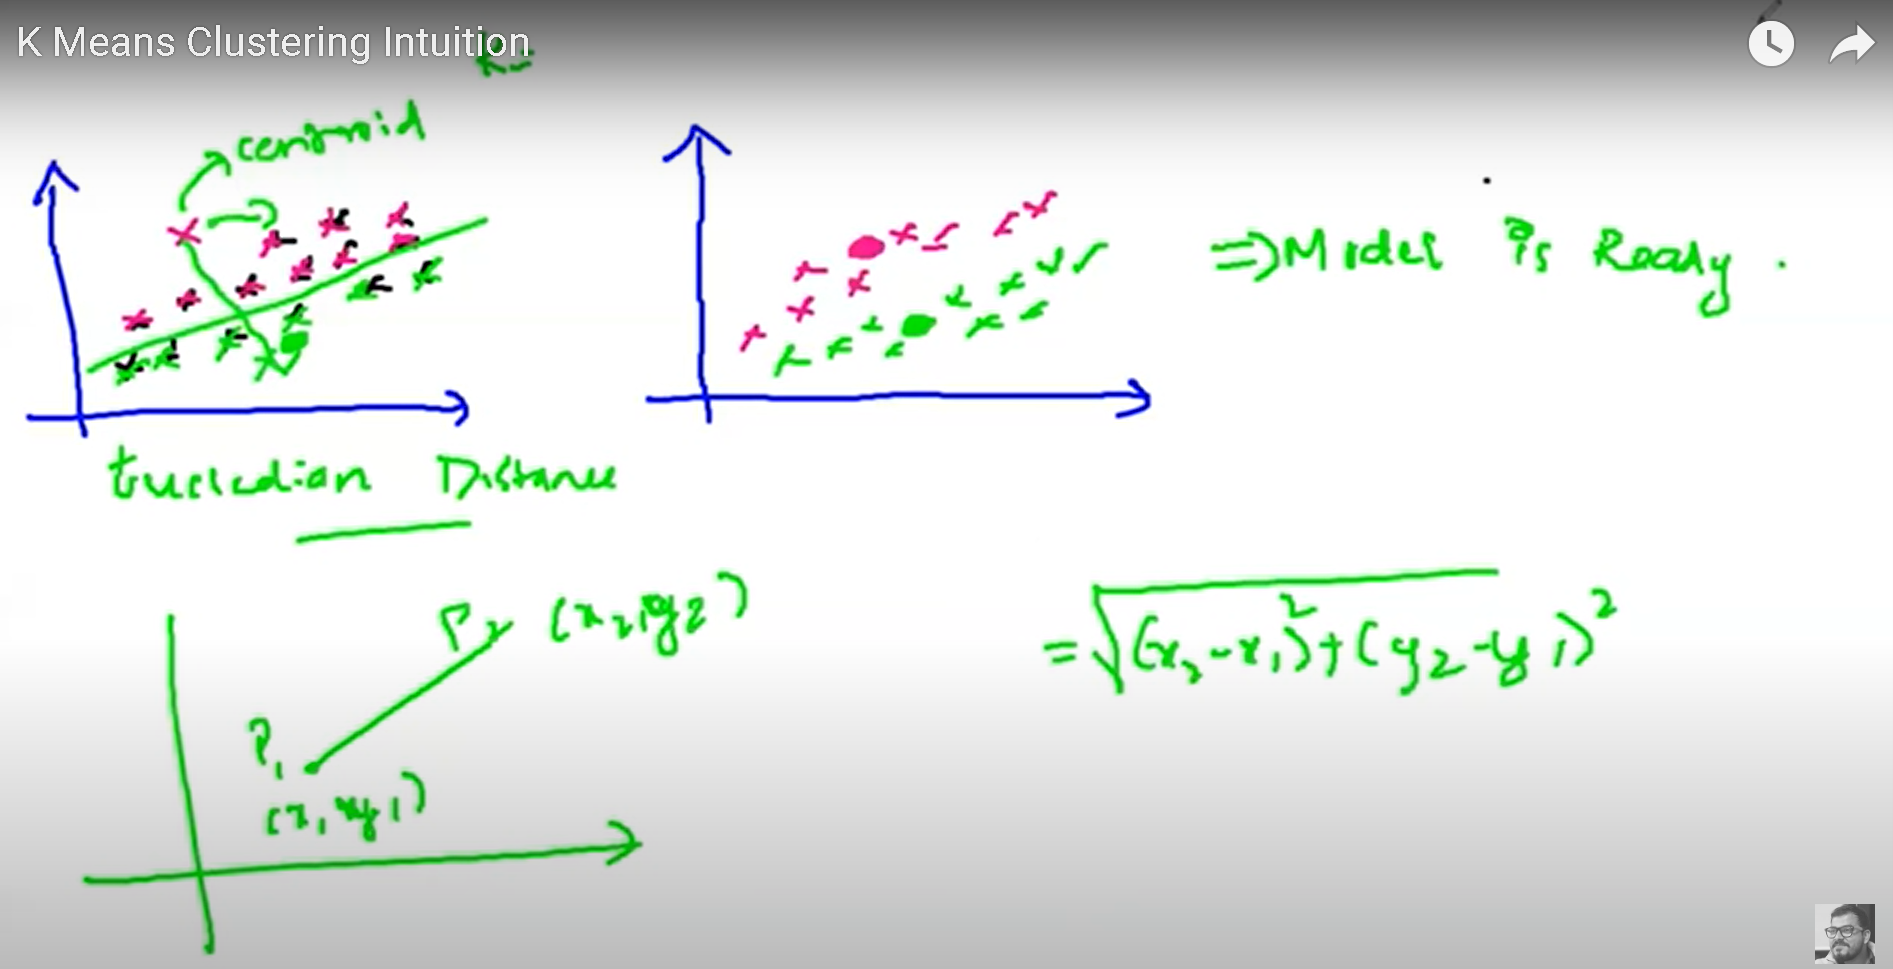

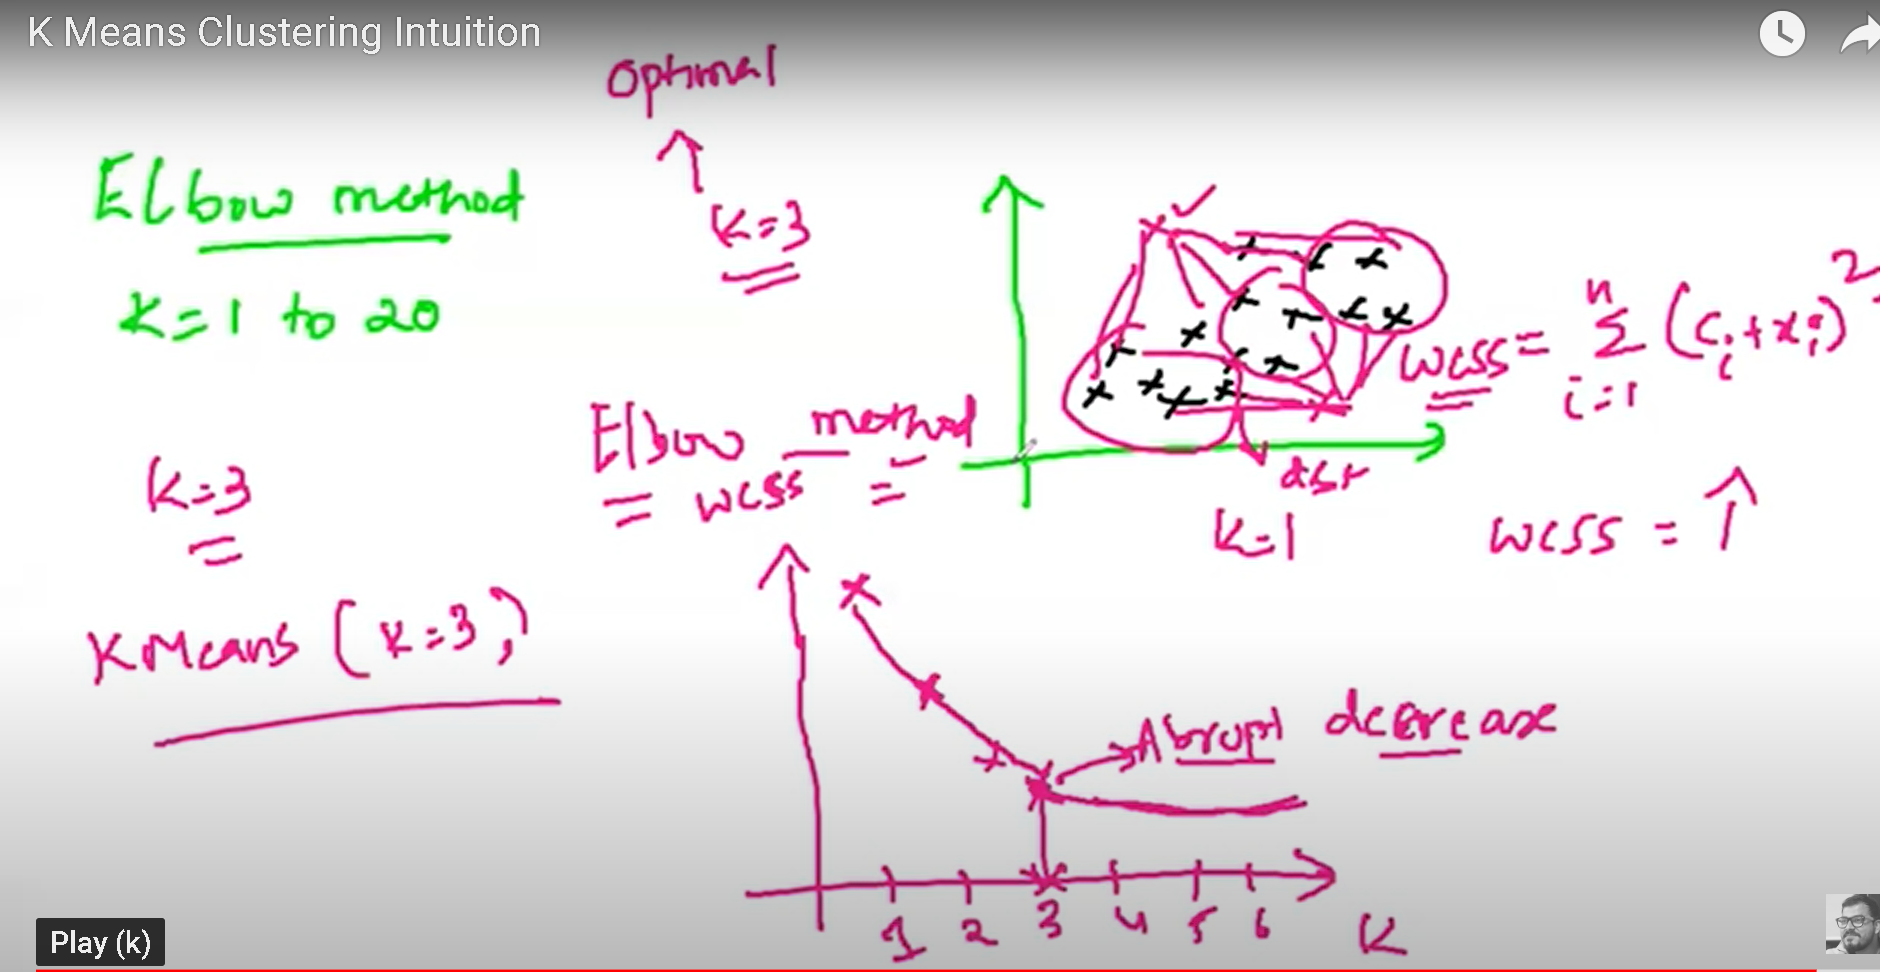

https://www.youtube.com/watch?v=AWKCCK5YHsE&t=29s  `Clusters`

WCSS = Within Cluster sum of Square

Abrupt Decrease - means sudden decrease

`K Means Clustering Practical :` https://www.youtube.com/watch?v=tAY6jtFoNEA&t=0s

# Types of Encoding

1. Nominal Encoding
2. Ordinal Encoding

In [ ]:
Nominal Encoding:
               Ex:  Gender, State

In [ ]:
Ordinal Encoding:
                We can re arange the catogorical based on types.
                Ex: bcom, phd, msc

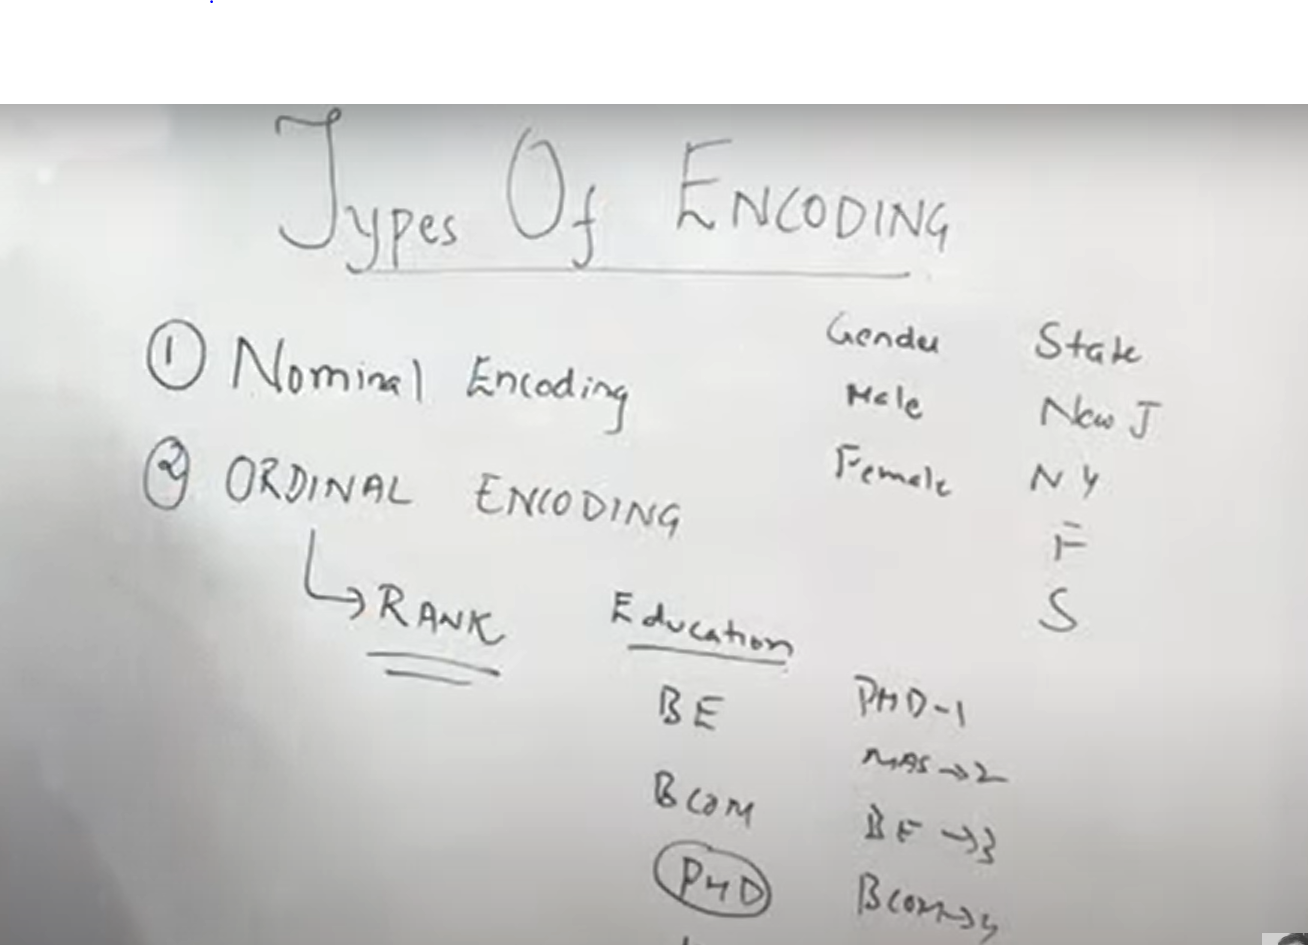

In [ ]:
Nominal Encoding:
                1) One hot Encoding
                2) One hot Encoding with many catogorical
                3) Mean Encoding

In [ ]:
Ordinal Encoding:
                1) Label Encoding
                2) Target Guided Ordinal Encoding